In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-reviews/winemag-data_first150k.csv
/kaggle/input/wine-reviews/winemag-data-130k-v2.json
/kaggle/input/wine-reviews/winemag-data-130k-v2.csv


In [2]:
df = pd.read_csv("/kaggle/input/wine-reviews/winemag-data-130k-v2.csv")
df.head(5)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Аналіз даних

In [3]:
df.shape

(129971, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [5]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [6]:
eda = df.drop(columns=['Unnamed: 0'])
eda = eda.reset_index(drop=True)

In [7]:
eda[eda.duplicated(['description','title'])].shape[0]

9983

In [8]:
eda = eda.drop_duplicates(['description','title'])
eda = eda.reset_index(drop=True)

In [9]:
eda[eda.duplicated(['taster_name', 'taster_twitter_handle'])].shape[0]

119968

In [10]:
eda = eda.drop('taster_twitter_handle' , axis = 1)

In [11]:
eda[eda.duplicated(['region_1', 'region_2'])].shape[0]

118751

In [12]:
eda = eda.drop('region_2',axis=1)

In [13]:
total = eda.isnull().sum().sort_values(ascending = False)
percent = (eda.isnull().sum()/eda.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
designation,34545,28.790379
taster_name,24917,20.766243
region_1,19560,16.301630
price,8395,6.996533
country,59,0.049172
province,59,0.049172
variety,1,0.000833
description,0,0.000000
points,0,0.000000
title,0,0.000000


In [14]:
eda[eda.variety.isna()]

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery
82317,Chile,"A chalky, dusty mouthfeel nicely balances this...",NaN,88,17.0,Maipo Valley,NaN,NaN,Carmen 1999 (Maipo Valley),NaN,Carmen


In [15]:
eda.dropna(subset=['variety'],inplace=True)

In [16]:
total = eda[~eda['price'].isna()].isnull().sum().sort_values(ascending = False)
percent = (eda[~eda['price'].isna()].isnull().sum()/eda[~eda['price'].isna()].isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total price_not_null', 'Percent'])
missing_data

,Total price_not_null,Percent
designation,32059,28.728762
taster_name,23272,20.854542
region_1,18012,16.140942
country,55,0.049287
province,55,0.049287
description,0,0.000000
points,0,0.000000
price,0,0.000000
title,0,0.000000
variety,0,0.000000


In [17]:
total = eda[eda['price'].isna()].isnull().sum().sort_values(ascending = False)
percent = (eda[eda['price'].isna()].isnull().sum()/eda[eda['price'].isna()].isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total price is null', 'Percent'])
missing_data

,Total price is null,Percent
price,8395,100.000000
designation,2485,29.600953
taster_name,1644,19.583085
region_1,1547,18.427635
country,4,0.047647
province,4,0.047647
description,0,0.000000
points,0,0.000000
title,0,0.000000
variety,0,0.000000


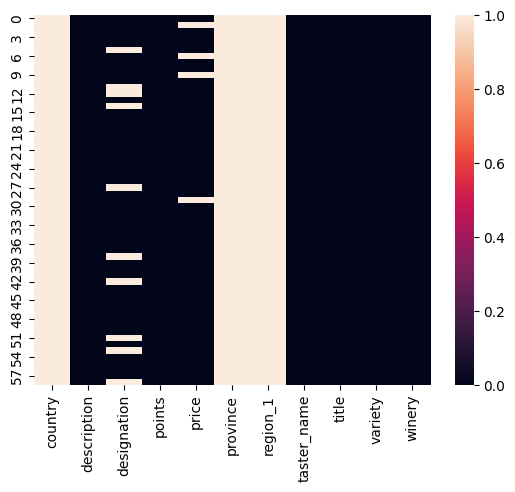

In [18]:
country_null_df = eda[eda['country'].isna()]
country_null_df = country_null_df.reset_index(drop=True)
sns.heatmap(country_null_df.isna())
plt.show()

In [19]:
eda.dropna(subset=['country'], inplace = True)

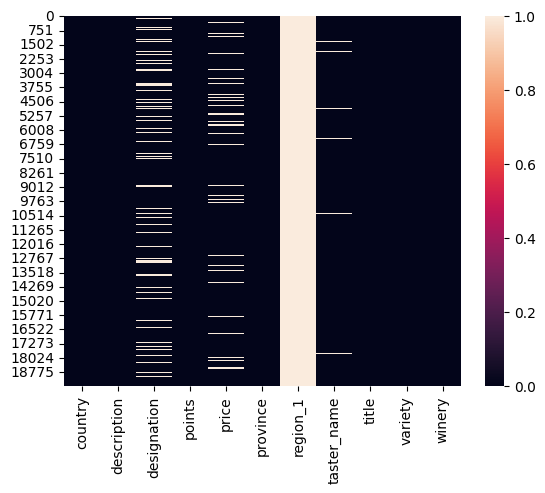

In [20]:
region1_null_df = eda[eda['region_1'].isna()]
region1_null_df = region1_null_df.reset_index(drop=True)
sns.heatmap(region1_null_df.isna())
plt.show()

In [21]:
object_columns = eda.select_dtypes(include=['object']).columns.tolist()
object_columns

['country',
 'description',
 'designation',
 'province',
 'region_1',
 'taster_name',
 'title',
 'variety',
 'winery']

In [22]:
eda[object_columns] = eda[object_columns].fillna('Unknown')
eda[object_columns].describe()

,country,description,designation,province,region_1,taster_name,title,variety,winery
count,119928,119928,119928,119928,119928,119928,119928,119928,119928
unique,43,119895,37955,425,1230,20,118780,701,16745
top,US,Subtle aromas of acacia flower and a whiff of ...,Unknown,California,Unknown,Unknown,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,50457,2,34534,33656,19500,24916,9,12275,211


In [23]:
median_value = eda['price'].median()
eda['price'] = eda['price'].fillna(median_value)

In [24]:
total = eda.isnull().sum().sort_values(ascending = False)
percent = (eda.isnull().sum()/eda.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
country,0,0.0
description,0,0.0
designation,0,0.0
points,0,0.0
price,0,0.0
province,0,0.0
region_1,0,0.0
taster_name,0,0.0
title,0,0.0
variety,0,0.0


In [25]:
eda.shape

(119928, 11)

In [26]:
eda['designation'] = eda['designation'].apply(lambda x: x.lower())
eda['description'] = eda['description'].apply(lambda x: x.lower())
eda['province'] = eda['province'].apply(lambda x: x.lower())
eda['region_1'] = eda['region_1'].apply(lambda x: x.lower())
eda['taster_name'] = eda['taster_name'].apply(lambda x: x.lower())
eda['variety'] = eda['variety'].apply(lambda x: x.lower())
eda['winery'] = eda['winery'].apply(lambda x: x.lower())

In [27]:
eda[object_columns].describe()

,country,description,designation,province,region_1,taster_name,title,variety,winery
count,119928,119928,119928,119928,119928,119928,119928,119928,119928
unique,43,119895,37697,425,1230,20,118780,701,16719
top,US,subtle aromas of acacia flower and a whiff of ...,unknown,california,unknown,unknown,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,pinot noir,wines & winemakers
freq,50457,2,34534,33656,19500,24916,9,12275,211


In [28]:
eda['designation_length'] = eda['designation'].apply(len)

In [29]:
eda[eda["designation_length"]<6].head()

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,designation_length
8,Germany,savory dried thyme notes accent sunnier flavor...,shine,87,12.0,rheinhessen,unknown,anna lee c. iijima,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,gewürztraminer,heinz eifel,5
13,Italy,this is dominated by oak and oak-driven aromas...,rosso,87,25.0,sicily & sardinia,etna,kerin o’keefe,Masseria Setteporte 2012 Rosso (Etna),nerello mascalese,masseria setteporte,5
15,Germany,zesty orange peels and apple notes abound in t...,devon,87,24.0,mosel,unknown,anna lee c. iijima,Richard Böcking 2013 Devon Riesling (Mosel),riesling,richard böcking,5
16,Argentina,"baked plum, molasses, balsamic vinegar and che...",felix,87,30.0,other,cafayate,michael schachner,Felix Lavaque 2010 Felix Malbec (Cafayate),malbec,felix lavaque,5
24,Italy,"aromas of prune, blackcurrant, toast and oak c...",aynat,87,35.0,sicily & sardinia,sicilia,kerin o’keefe,Canicattì 2009 Aynat Nero d'Avola (Sicilia),nero d'avola,canicattì,5


In [30]:
list_of_sus = eda[eda["designation_length"]<6].designation.unique()
with open("file.txt", "w") as output:
    output.write(str(list(list_of_sus)))

In [31]:
list_of_sus

array(['shine', 'rosso', 'devon', ..., 'calon', 'croft', 'dom'],
      dtype=object)

# Візуалізація даних

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


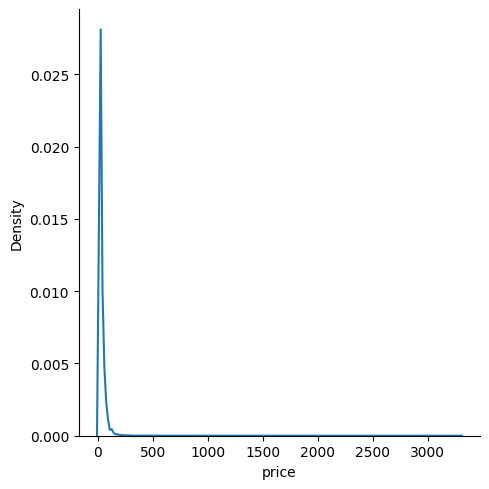

In [32]:
sns.displot(eda['price'],kind='kde')
plt.show()

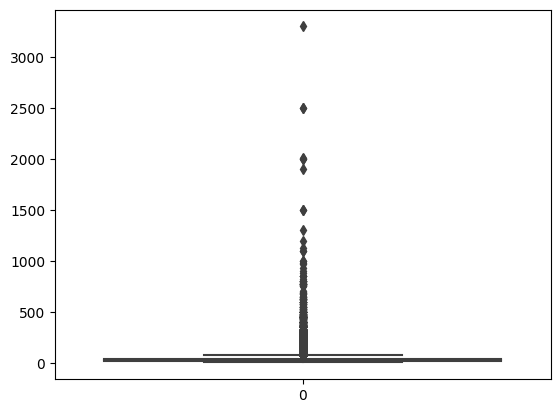

In [33]:
sns.boxplot(eda['price'])
plt.show()

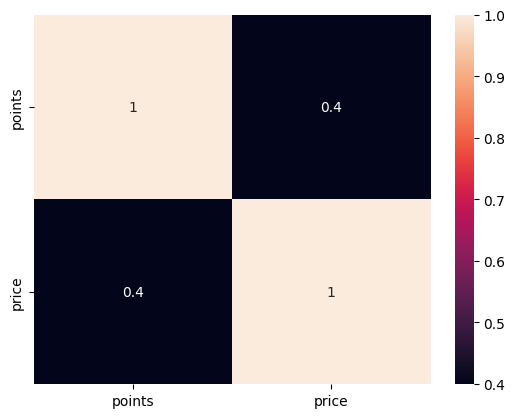

In [34]:
sns.heatmap(eda[['points','price']].corr(),annot=True)
plt.show()

In [35]:
eda['log_price'] = np.log1p(eda['price'])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


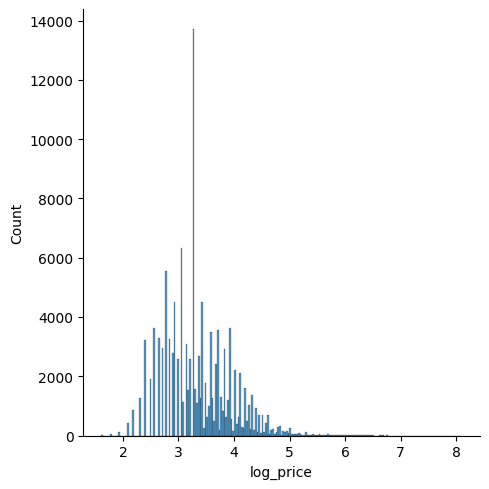

In [36]:
sns.displot(eda['log_price'])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


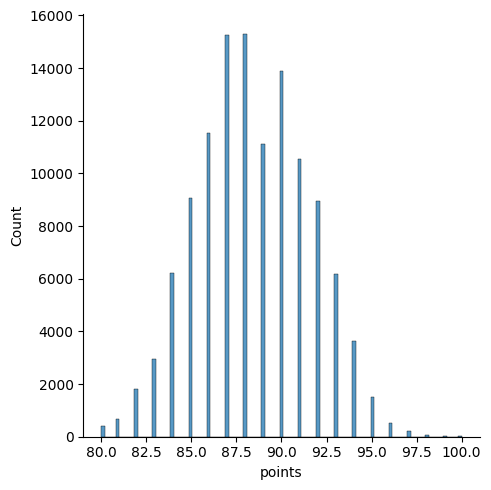

In [37]:
sns.displot(eda['points'])
plt.show()

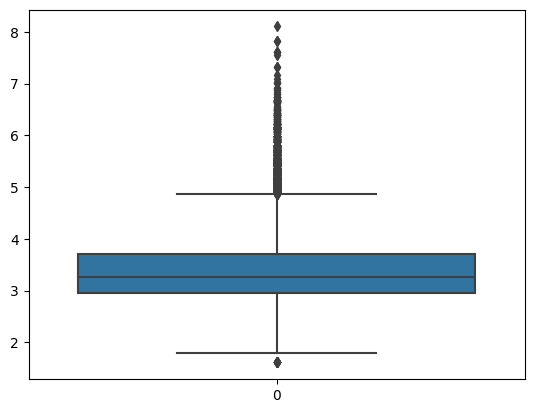

In [38]:
sns.boxplot(eda['log_price'])
plt.show()

In [39]:
from scipy import stats
eda['box_cox_price'], lambda_val = stats.boxcox(eda['price'])
print(f"Lambda value: {lambda_val}")

Lambda value: -0.3103003305981917


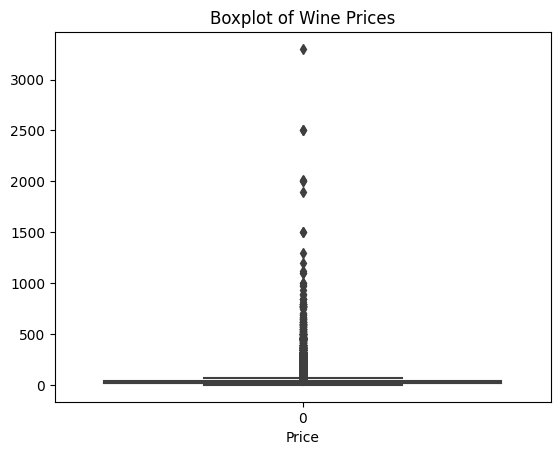

In [40]:
sns.boxplot(eda['price'])
plt.title("Boxplot of Wine Prices") 
plt.xlabel("Price")  
plt.show()

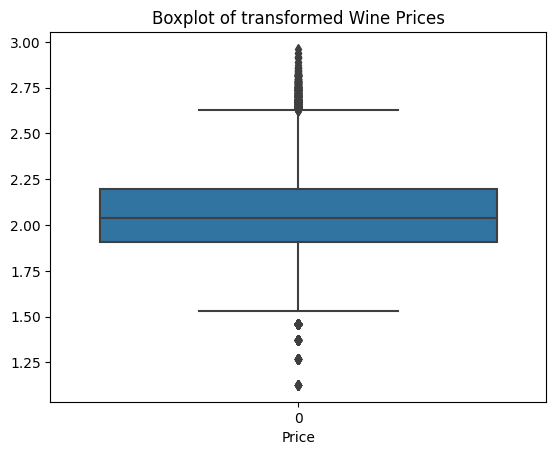

In [41]:
sns.boxplot(eda['box_cox_price'])
plt.title("Boxplot of transformed Wine Prices") 
plt.xlabel("Price") 
plt.show()

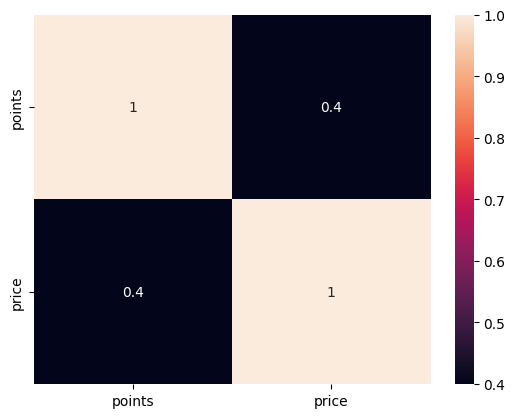

In [42]:
sns.heatmap(eda[['points','price']].corr(),annot=True)
plt.show()

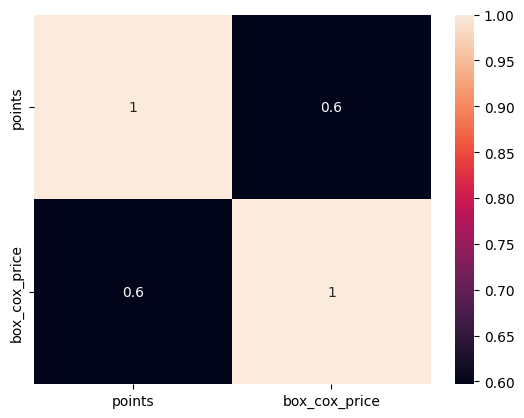

In [43]:
sns.heatmap(eda[['points','box_cox_price']].corr(),annot=True)
plt.show()

In [44]:
eda[object_columns].describe()

,country,description,designation,province,region_1,taster_name,title,variety,winery
count,119928,119928,119928,119928,119928,119928,119928,119928,119928
unique,43,119895,37697,425,1230,20,118780,701,16719
top,US,subtle aromas of acacia flower and a whiff of ...,unknown,california,unknown,unknown,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,pinot noir,wines & winemakers
freq,50457,2,34534,33656,19500,24916,9,12275,211


In [45]:
duplicate_titles = eda['title'][eda['title'].duplicated()].unique()
pd.set_option('display.max_colwidth', None)
first_duplicate_pair = eda[eda['title'] == duplicate_titles[2]]
first_duplicate_pair[['title','designation','province','region_1','winery']]

,title,designation,province,region_1,winery
2359,Domaines Devillard 2011 Château de Chamirey (Mercurey),château de chamirey,burgundy,mercurey,domaines devillard
2360,Domaines Devillard 2011 Château de Chamirey (Mercurey),château de chamirey,burgundy,mercurey,domaines devillard


In [46]:
duplicate_des = eda['description'][eda['description'].duplicated()].unique()

first_duplicate_pair = eda[eda['description'] == duplicate_des[0]]
first_duplicate_pair

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,designation_length,log_price,box_cox_price
4216,Italy,"this zesty red has pretty aromas that suggest small red berry, blue flower and a whiff of moist soil. the vibrant palate offers sour cherry, pomegranate and a hint of anise alongside zesty acidity and refined tannins.",unknown,88,30.0,tuscany,rosso di montalcino,kerin o’keefe,Ridolfi 2014 Rosso di Montalcino,sangiovese,ridolfi,7,3.433987,2.101011
19095,Italy,"this zesty red has pretty aromas that suggest small red berry, blue flower and a whiff of moist soil. the vibrant palate offers sour cherry, pomegranate and a hint of anise alongside zesty acidity and refined tannins.",unknown,87,30.0,tuscany,rosso di montalcino,kerin o’keefe,Carpineto 2014 Rosso di Montalcino,sangiovese,carpineto,7,3.433987,2.101011


In [47]:
grouped_eda = eda.groupby(['country'])[['price','points']].mean().reset_index().sort_values('price',ascending=False)
grouped_eda[['country','price']].head(n=10)

,country,price
38,Switzerland,72.833333
14,England,50.920635
17,Germany,43.080823
19,Hungary,42.100775
15,France,38.598290
22,Italy,37.902899
40,US,36.646749
7,Canada,35.681416
2,Australia,35.550296
21,Israel,31.581545


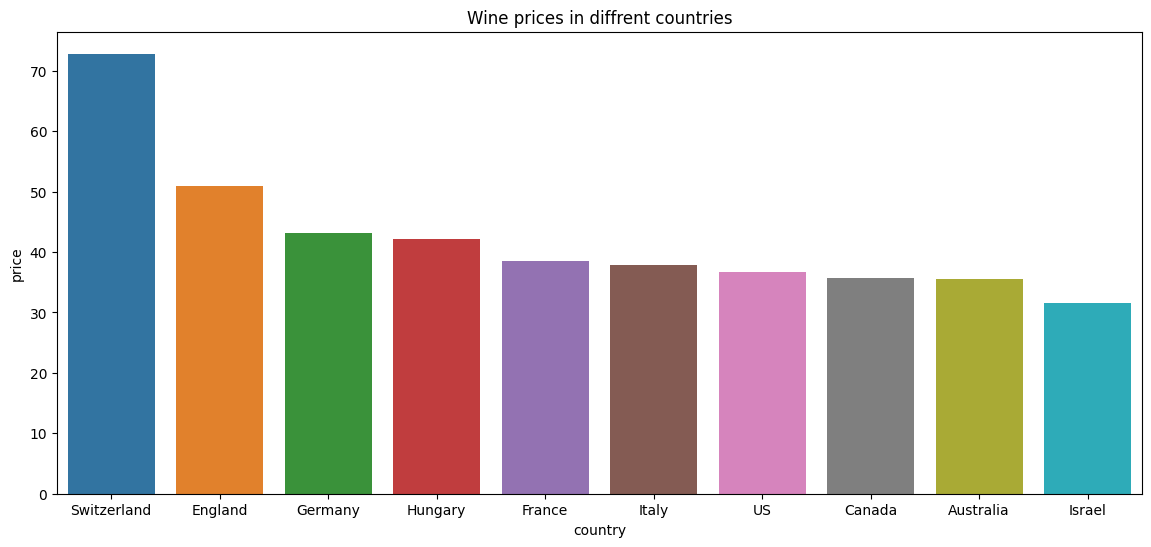

In [48]:
plt.figure(figsize = (14,6))
plt.title('Wine prices in diffrent countries')
sns.barplot(x = 'country', y="price", data=grouped_eda.head(10))
plt.show()

In [49]:
grouped_eda=grouped_eda.sort_values('points', ascending=False)
grouped_eda[['country','points']].head(10)

,country,points
14,England,91.746032
20,India,90.250000
3,Austria,90.129532
17,Germany,89.895582
7,Canada,89.309735
19,Hungary,89.294574
9,China,89.000000
15,France,88.866752
24,Luxembourg,88.800000
28,Morocco,88.708333


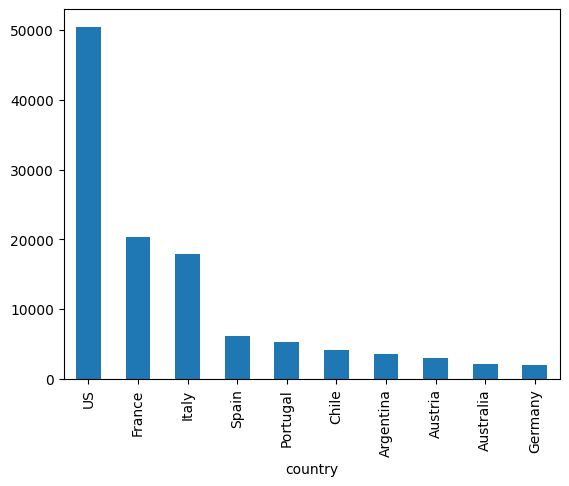

In [50]:
eda['country'].value_counts().head(10).plot.bar()
plt.show()

In [51]:
grouped_eda['quality/price']=grouped_eda['points']/grouped_eda['price']
grouped_eda.sort_values('quality/price', ascending=False)[['country','quality/price']]

,country,quality/price
41,Ukraine,9.124031
4,Bosnia and Herzegovina,6.920000
20,India,6.563636
1,Armenia,6.034483
6,Bulgaria,5.921388
32,Romania,5.629156
25,Macedonia,5.552326
34,Slovakia,5.437500
11,Cyprus,5.278788
27,Moldova,5.208111


In [52]:
def top10_boxplots(name,data,y):
    box_df = data[data[name].isin(data[name].value_counts().head(10).index)]
    plt.figure(figsize = (14,6))
    sns.boxplot(
        x = name,
        y = y,
        data = box_df
    )
    plt.show()

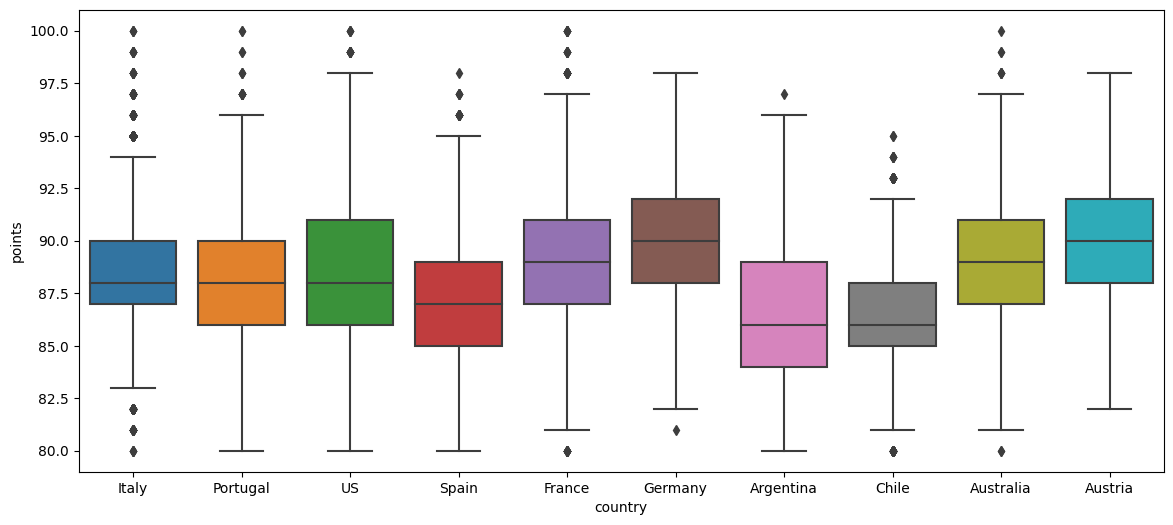

In [53]:
top10_boxplots('country',eda,'points')

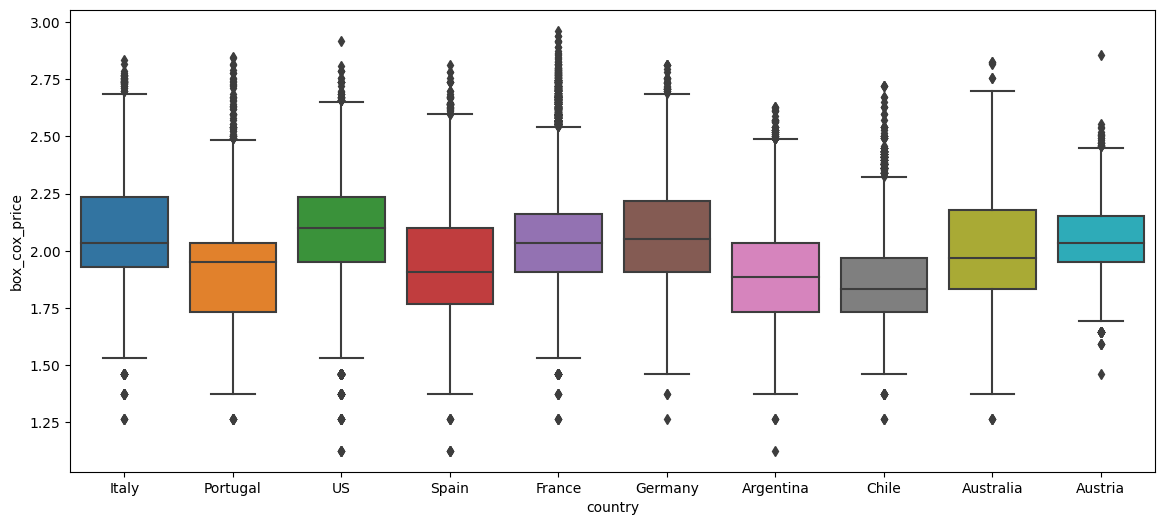

In [73]:
top10_boxplots('country',eda,'box_cox_price')

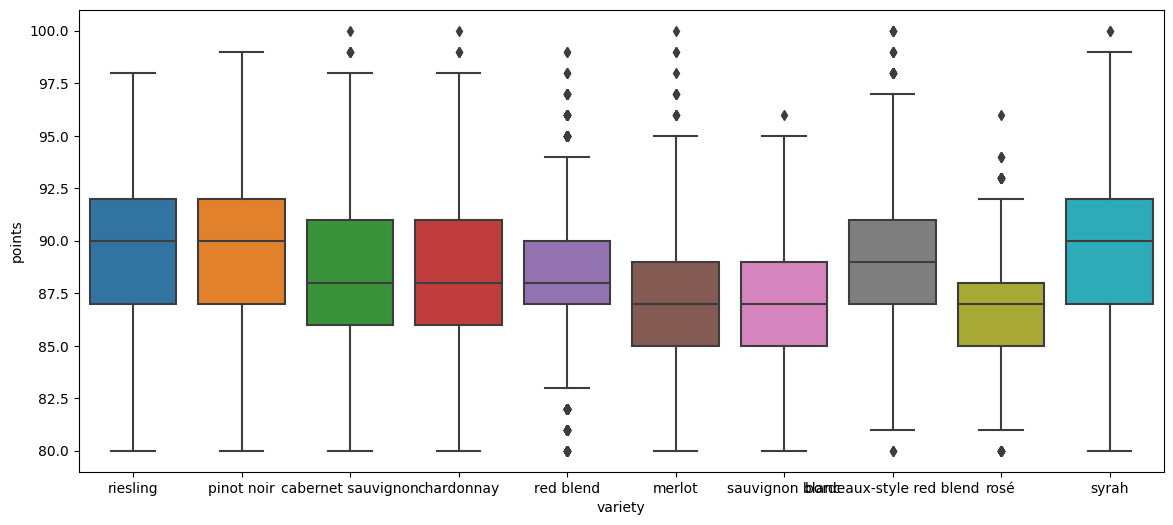

In [55]:
top10_boxplots('variety',eda,'points')

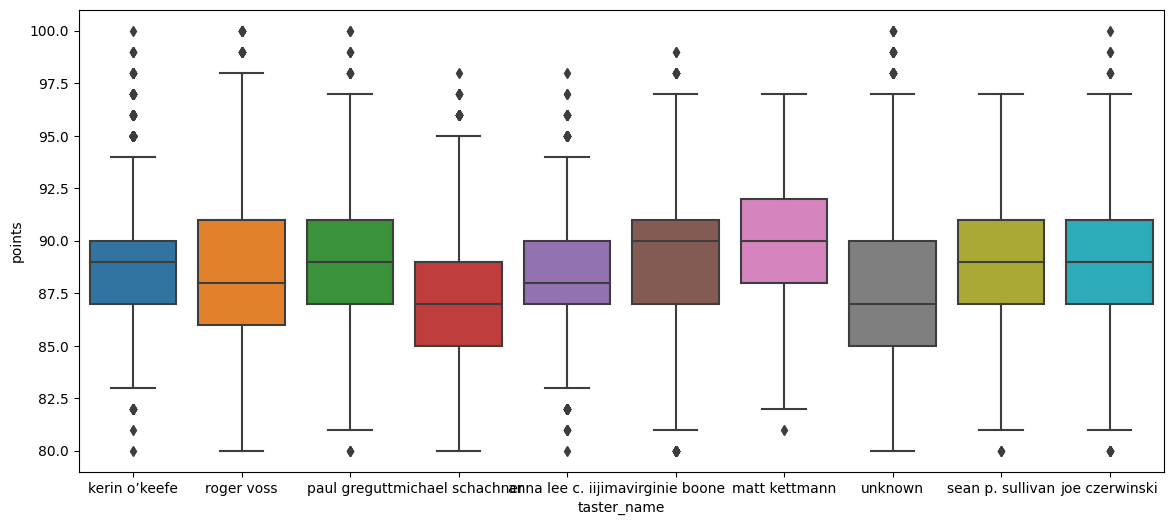

In [56]:
top10_boxplots('taster_name',eda,'points')

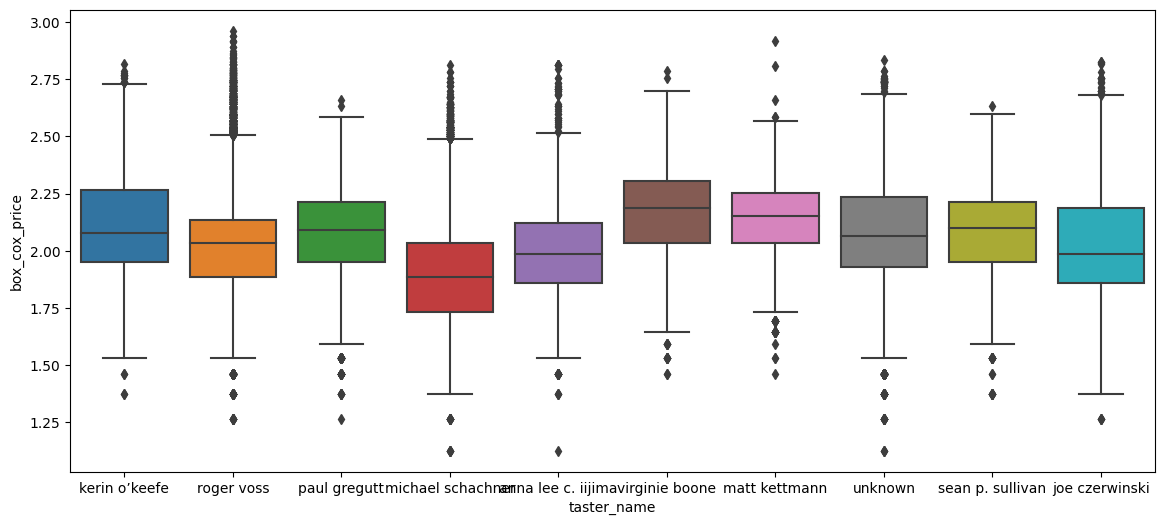

In [72]:
top10_boxplots('taster_name',eda,'box_cox_price')

In [58]:
from sklearn.preprocessing import LabelEncoder
def corr_spearmen(df,with_num=False, columns_to_ignore = ['description','title'], t = "Кореляція Спірмена між категоріальними змінними (LabelEncoded)"):
    columns_to_drop = columns_to_ignore
    
    if(with_num):
        eda_encoded = eda.copy()
        for col in columns_to_drop:
            if(col in eda_encoded.columns):
                eda_encoded.drop(col,inplace = True,axis=1)
    else:
        eda_encoded = pd.DataFrame()
    le = LabelEncoder()
    remaining_columns =  [col for col in object_columns if col not in columns_to_drop]
    for col in remaining_columns:
        eda_encoded[col] = le.fit_transform(df[col])
   
    
    correlation_matrix = eda_encoded.corr(method='spearman')
    
    # Побудова теплової карти
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title(t)
    plt.show()
#corr_spearmen(eda,False,['description']) 

# DP

In [59]:
import re
# Функція для обробки title
def process_title(row):
    title = row["title"]
    
    if row["province"] != "Unknown":
        title = re.sub(rf"\b{re.escape(row['province'])}\b", "", title)
    if row["region_1"] != "Unknown":
        title = re.sub(rf"\b{re.escape(row['region_1'])}\b", "", title)
    if row["winery"] != "Unknown":
        # Врахування дужок навколо winery
        title = re.sub(rf"\(?\b{re.escape(row['winery'])}\b\)?", "", title)
    if row["variety"] != "Unknown":
        title = re.sub(rf"\b{re.escape(row['variety'])}\b", "", title)
    if row["designation"] != "Unknown":
        title = re.sub(rf"\b{re.escape(row['designation'])}\b", "", title)

    # Видалення всього, що в дужках, і самих дужок
    title = re.sub(r"\([^)]*\)", "", title)
    
    # Виділення року
    year_match = re.search(r"\b(19[0-9]{2}|20[0-9]{2})\b", title)
    year = year_match.group(0) if year_match else "Unknown"

    # Видалення року з title
    title = re.sub(r"\b(19[0-9]{2}|20[0-9]{2})\b", "", title)

    # Видалення зайвих пробілів
    title = re.sub(r"\s+", " ", title).strip()
    
    return title, year

# Застосування функції до кожного рядка
eda[["title", "year"]] = eda.apply(lambda row: pd.Series(process_title(row)), axis=1)
eda.to_csv('withyear.csv',index=False)

In [60]:
eda.head()

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,designation_length,log_price,box_cox_price,year
0,Italy,"aromas include tropical fruit, broom, brimstone and dried herb. the palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",vulkà bianco,87,25.0,sicily & sardinia,etna,kerin o’keefe,Nicosia Vulkà Bianco,white blend,nicosia,12,3.258097,2.035723,2013
1,Portugal,"this is ripe and fruity, a wine that is smooth while still structured. firm tannins are filled out with juicy red berry fruits and freshened with acidity. it's already drinkable, although it will certainly be better from 2016.",avidagos,87,15.0,douro,unknown,roger voss,Quinta dos Avidagos Avidagos Red,portuguese red,quinta dos avidagos,8,2.772589,1.831847,2011
2,US,"tart and snappy, the flavors of lime flesh and rind dominate. some green pineapple pokes through, with crisp acidity underscoring the flavors. the wine was all stainless-steel fermented.",unknown,87,14.0,oregon,willamette valley,paul gregutt,Rainstorm Pinot Gris,pinot gris,rainstorm,7,2.708050,1.801750,2013
3,US,"pineapple rind, lemon pith and orange blossom start off the aromas. the palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",reserve late harvest,87,13.0,michigan,lake michigan shore,alexander peartree,St. Julian Reserve Late Harvest Riesling,riesling,st. julian,20,2.639057,1.768696,2013
4,US,"much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",vintner's reserve wild child block,87,65.0,oregon,willamette valley,paul gregutt,Sweet Cheeks Vintner's Reserve Wild Child Block Pinot Noir,pinot noir,sweet cheeks,34,4.189655,2.340275,2012


In [61]:
object_columns = eda.select_dtypes(include=['object']).columns.tolist()
eda[object_columns].describe()

,country,description,designation,province,region_1,taster_name,title,variety,winery,year
count,119928,119928,119928,119928,119928,119928,119928,119928,119928,119928
unique,43,119895,37697,425,1230,20,78040,701,16719,62
top,US,"subtle aromas of acacia flower and a whiff of almond lead the way. the round, easygoing palate offers pear, citrus peel and a hint of hazelnut alongside soft acidity.",unknown,california,unknown,unknown,L. Tramier & Fils Collection,pinot noir,wines & winemakers,2012
freq,50457,2,34534,33656,19500,24916,31,12275,211,14355


In [62]:
len(eda[eda['year']=='Unknown'])

4283

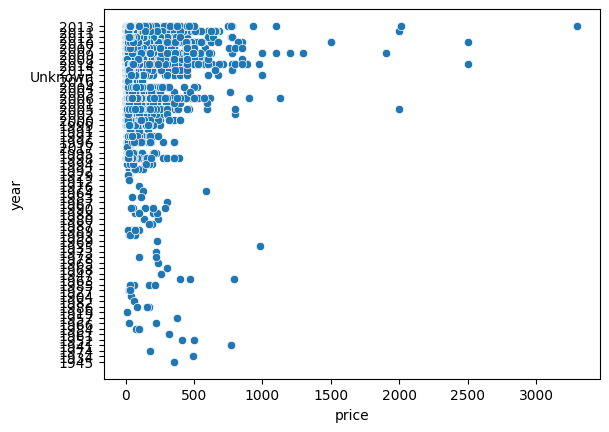

In [63]:
sns.scatterplot(data = eda, x = 'price', y = 'year')
plt.show()

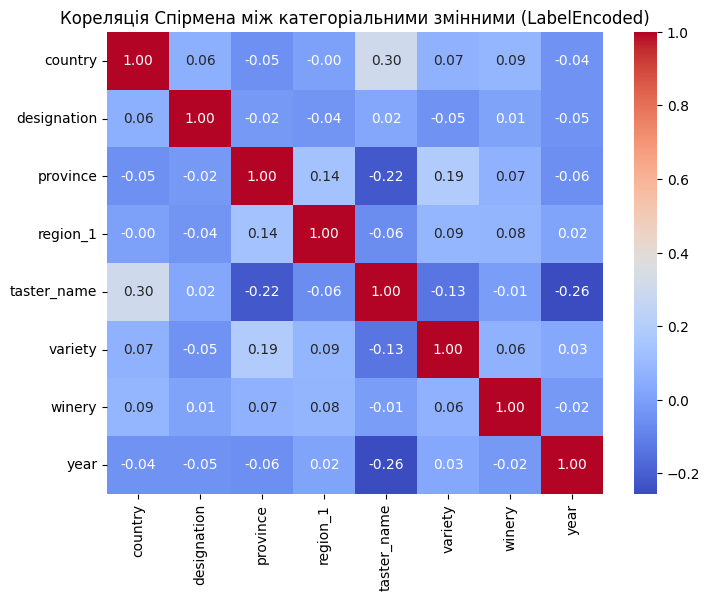

In [64]:
corr_spearmen(eda)

In [65]:
eda.drop('designation',inplace=True,axis=1)


In [66]:

eda.drop(['price','log_price','title','designation_length'],axis = 1).info()

<class 'pandas.core.frame.DataFrame'>
Index: 119928 entries, 0 to 119987
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   country        119928 non-null  object 
 1   description    119928 non-null  object 
 2   points         119928 non-null  int64  
 3   province       119928 non-null  object 
 4   region_1       119928 non-null  object 
 5   taster_name    119928 non-null  object 
 6   variety        119928 non-null  object 
 7   winery         119928 non-null  object 
 8   box_cox_price  119928 non-null  float64
 9   year           119928 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 14.1+ MB


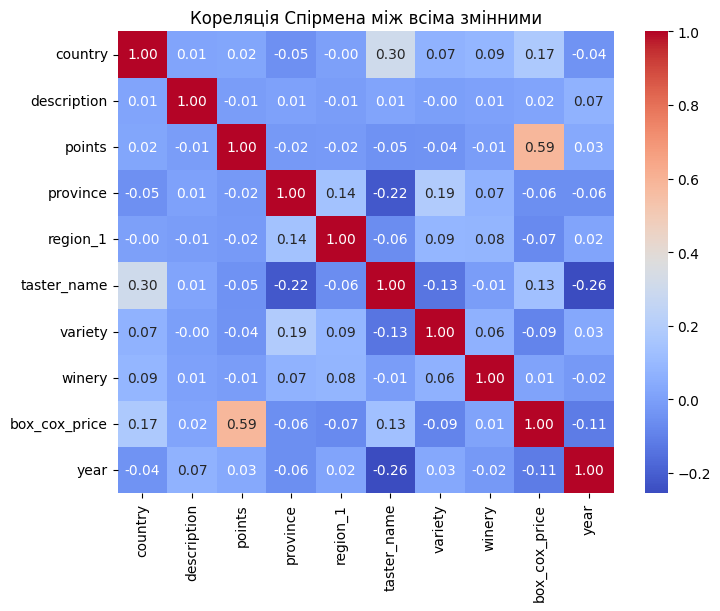

In [67]:

corr_spearmen(eda,True,columns_to_ignore=['log_price','price','title','designation','designation_length'],t='Кореляція Спірмена між всіма змінними')

# FIA

In [68]:
from sklearn.feature_selection import f_classif

categorical_features = eda.select_dtypes(include=["object", "category"]).copy()
X_encoded = categorical_features.apply(lambda col: LabelEncoder().fit_transform(col))
y = LabelEncoder().fit_transform(eda["points"])
print(y[1])
# Обчислення F-статистики та p-значення
f_scores, p_values = f_classif(X_encoded, y)

# Формуємо таблицю результатів
anova_results = pd.DataFrame({
    "Feature": X_encoded.columns,
    "F-Score": f_scores,
    "p-Value": p_values
}).sort_values(by="F-Score", ascending=False)

7


In [69]:
anova_results.head(10)

,Feature,F-Score,p-Value
4,taster_name,86.522364,0.000000e+00
2,province,62.596325,1.355746e-251
8,year,48.817222,2.897868e-193
0,country,15.775040,6.564645e-55
6,variety,12.995771,1.283479e-43
3,region_1,4.242426,5.868425e-10
5,title,2.010258,4.710475e-03
1,description,1.663430,3.153654e-02
7,winery,1.657736,3.246202e-02


In [70]:
object_columns1 = eda.select_dtypes(include=['object']).columns.tolist()
eda[object_columns1].describe()

,country,description,province,region_1,taster_name,title,variety,winery,year
count,119928,119928,119928,119928,119928,119928,119928,119928,119928
unique,43,119895,425,1230,20,78040,701,16719,62
top,US,"subtle aromas of acacia flower and a whiff of almond lead the way. the round, easygoing palate offers pear, citrus peel and a hint of hazelnut alongside soft acidity.",california,unknown,unknown,L. Tramier & Fils Collection,pinot noir,wines & winemakers,2012
freq,50457,2,33656,19500,24916,31,12275,211,14355


In [71]:
len(eda[eda['points']==81])

689